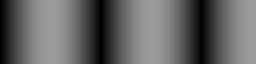

In [12]:
from PIL import Image
from math import *
import random
import numpy as np
from matplotlib import pyplot as plt

w = 256
h = 64
img = Image.new( 'L', (w, h), "black") # Create a new black image
pixels = img.load() # Create the pixel map
for i in range(img.size[0]):    # For every pixel:
    for j in range(img.size[1]):
        pixels[i,j] = int(abs(sin(i/32))*155)
img
#imshow(np.asarray(img))
#img.show()

sigmat: 0.1


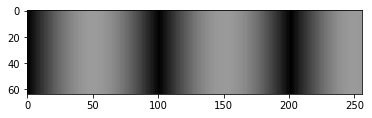

sigmat: 0.2


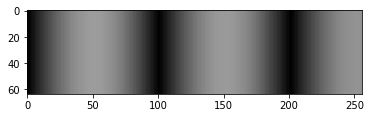

In [ ]:
def render(sigmaT):
    data = np.zeros([h, w, 3], dtype=np.float)
    pixelToDist = 5.0 / w
    distToPixel = 1.0 / pixelToDist
    spp = 1000;
    for p in range(spp):
        sampledDist = -log(1.0-random.random()) / sigmaT
        for x in range(w):
            if (sampledDist < (x*pixelToDist)):
                continue
            t = abs(sin(x/32))
            p = exp(-x*pixelToDist*sigmaT)
            for y in range(h):
                data[y,x]+=t/p
    
    for x in range(w):
        for y in range(h):                            
            data[y,x] /=float(spp)

    img = Image.fromarray(np.uint8(data * 155))

#    plt.imshow(img, cmap=plt.cm.ocean, interpolation = 'bicubic')
    print("sigmat:", sigmaT)
    plt.imshow(img)
#    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()    

for sigmaT in range(1,11):
    render(sigmaT/10.0)
    #imshow(np.asarray(img2))
